###  Etude sur Introduction aux réseaux de neurones artificiels 2 - classification

### test

### 1 - Importation des librairies Python nécessaires à la résolution du problème

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle as pkl
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 2 - Chargement de modèle et des données test

In [16]:
model = joblib.load("model_MLPC.pkl")

In [17]:
model

MLPClassifier(hidden_layer_sizes=22, max_iter=10000, random_state=42,
              solver='lbfgs')

In [18]:
X_train = joblib.load("X_train.joblib")

In [19]:
y_train = joblib.load("y_train.joblib")

In [20]:
X_test = joblib.load("X_test.joblib")

In [21]:
y_test = joblib.load("y_test.joblib")

### 3 - test avec le modèle

In [22]:
model.score(X_test, y_test)

0.9736842105263158

In [23]:
y_predict_test = model.predict(X_test)

In [24]:
#création de matrix de confusion
cm_test = confusion_matrix(y_test, y_predict_test)

In [25]:
cm_test

array([[42,  1],
       [ 2, 69]], dtype=int64)

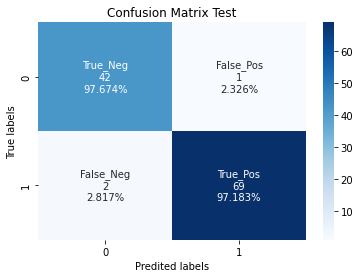

In [26]:
#pour RAJOUTER les labels et les pourcentages sur le graphique, passer par seaborn
#fig = plt.figure(figsize=(15, 7), dpi=100)
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_test.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_test.flatten()[0:2]/np.sum(cm_test.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_test.flatten()[2:]/np.sum(cm_test.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_test, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()